In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset=pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=dataset.iloc [:, [0,1,2,3,4,5,6,7]].values
Y=dataset.iloc[:,8].values
X[0:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [5]:
Y[0:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train

array([[  2.   ,  84.   ,   0.   , ...,   0.   ,   0.304,  21.   ],
       [  9.   , 112.   ,  82.   , ...,  28.2  ,   1.282,  50.   ],
       [  1.   , 139.   ,  46.   , ...,  28.7  ,   0.654,  22.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [7]:
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [8]:
X_train

array([[0.11764706, 0.42211055, 0.        , ..., 0.        , 0.09649872,
        0.        ],
       [0.52941176, 0.56281407, 0.67213115, ..., 0.42026826, 0.51409052,
        0.48333333],
       [0.05882353, 0.69849246, 0.37704918, ..., 0.42771982, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

In [9]:
X_test

array([[0.35294118, 0.49246231, 0.47540984, ..., 0.50670641, 0.15029889,
        0.36666667],
       [0.11764706, 0.56281407, 0.6147541 , ..., 0.53204173, 0.02988898,
        0.        ],
       [0.11764706, 0.54271357, 0.52459016, ..., 0.45901639, 0.03415884,
        0.        ],
       ...,
       [0.47058824, 0.47738693, 0.59016393, ..., 0.54843517, 0.17378309,
        0.6       ],
       [0.11764706, 0.73366834, 0.57377049, ..., 0.41728763, 0.11058924,
        0.13333333],
       [0.47058824, 0.3718593 , 0.57377049, ..., 0.52608048, 0.2677199 ,
        0.3       ]])

In [10]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [11]:
Y_pred= classifier.predict(X_test)

In [12]:
Y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[84, 15],
       [23, 32]], dtype=int64)

In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))


Accuracy: 0.7532467532467533
Precision: 0.6808510638297872
Recall: 0.5818181818181818


Text(0.5, 257.44, 'Predicted label')

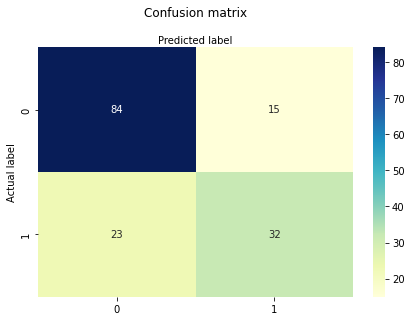

In [15]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
